In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data_dir = "/home/daielchom/Documents/projects/maestria/data/datasets/leaf_classification/"

See the files in data_dir, You have to see two files and one folder: `test.csv`, `images`, `train.csv`

In [6]:
os.listdir(data_dir)

['test.csv', 'images', 'train.csv']

# Features

In [8]:
train = pd.read_csv(data_dir+"/train.csv")
test = pd.read_csv(data_dir+"/test.csv")

In [9]:
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [10]:
train.shape, test.shape

((990, 194), (594, 193))

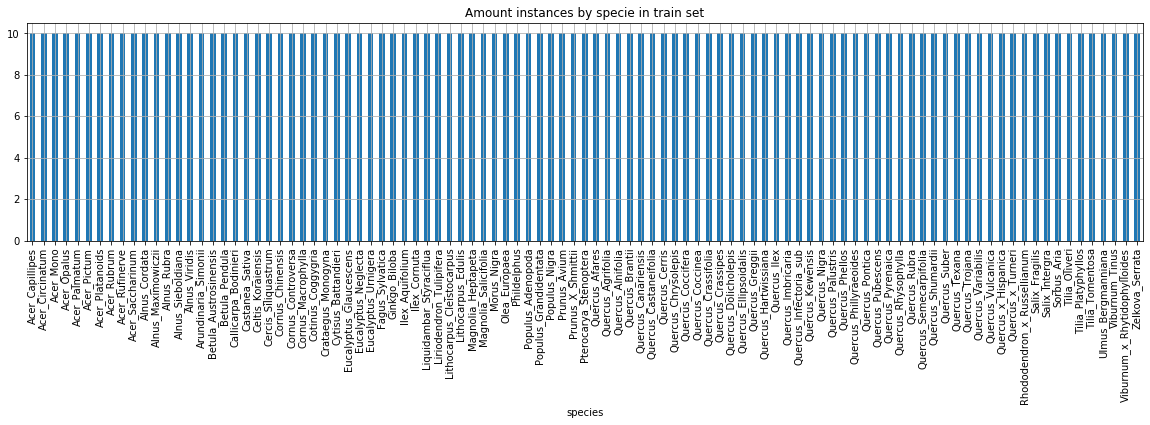

In [25]:
plt.figure()
train.id.groupby(train.species).count().plot.bar(figsize=(20, 4))
plt.title("Amount instances by specie in train set")
plt.grid()

In [31]:
num_classes = train.species.value_counts().shape[0]
print("There are {} classes for the classification task.".format(num_classes))

There are 99 classes for the classification task.


In [66]:
features = [i for i in train.columns if i not in ["species", "id"]]
len(features)

192

In [61]:
#features

In [43]:
species = train.species.value_counts().index.tolist()
species = {species[i]:i for i in range(len(species))}

We can convert the species column to a numeric vector.

In [46]:
put_class = lambda x:species[x]
target = train.species.apply(put_class).values
len(target)

In [60]:
#target

In [69]:
fs = features[::3]

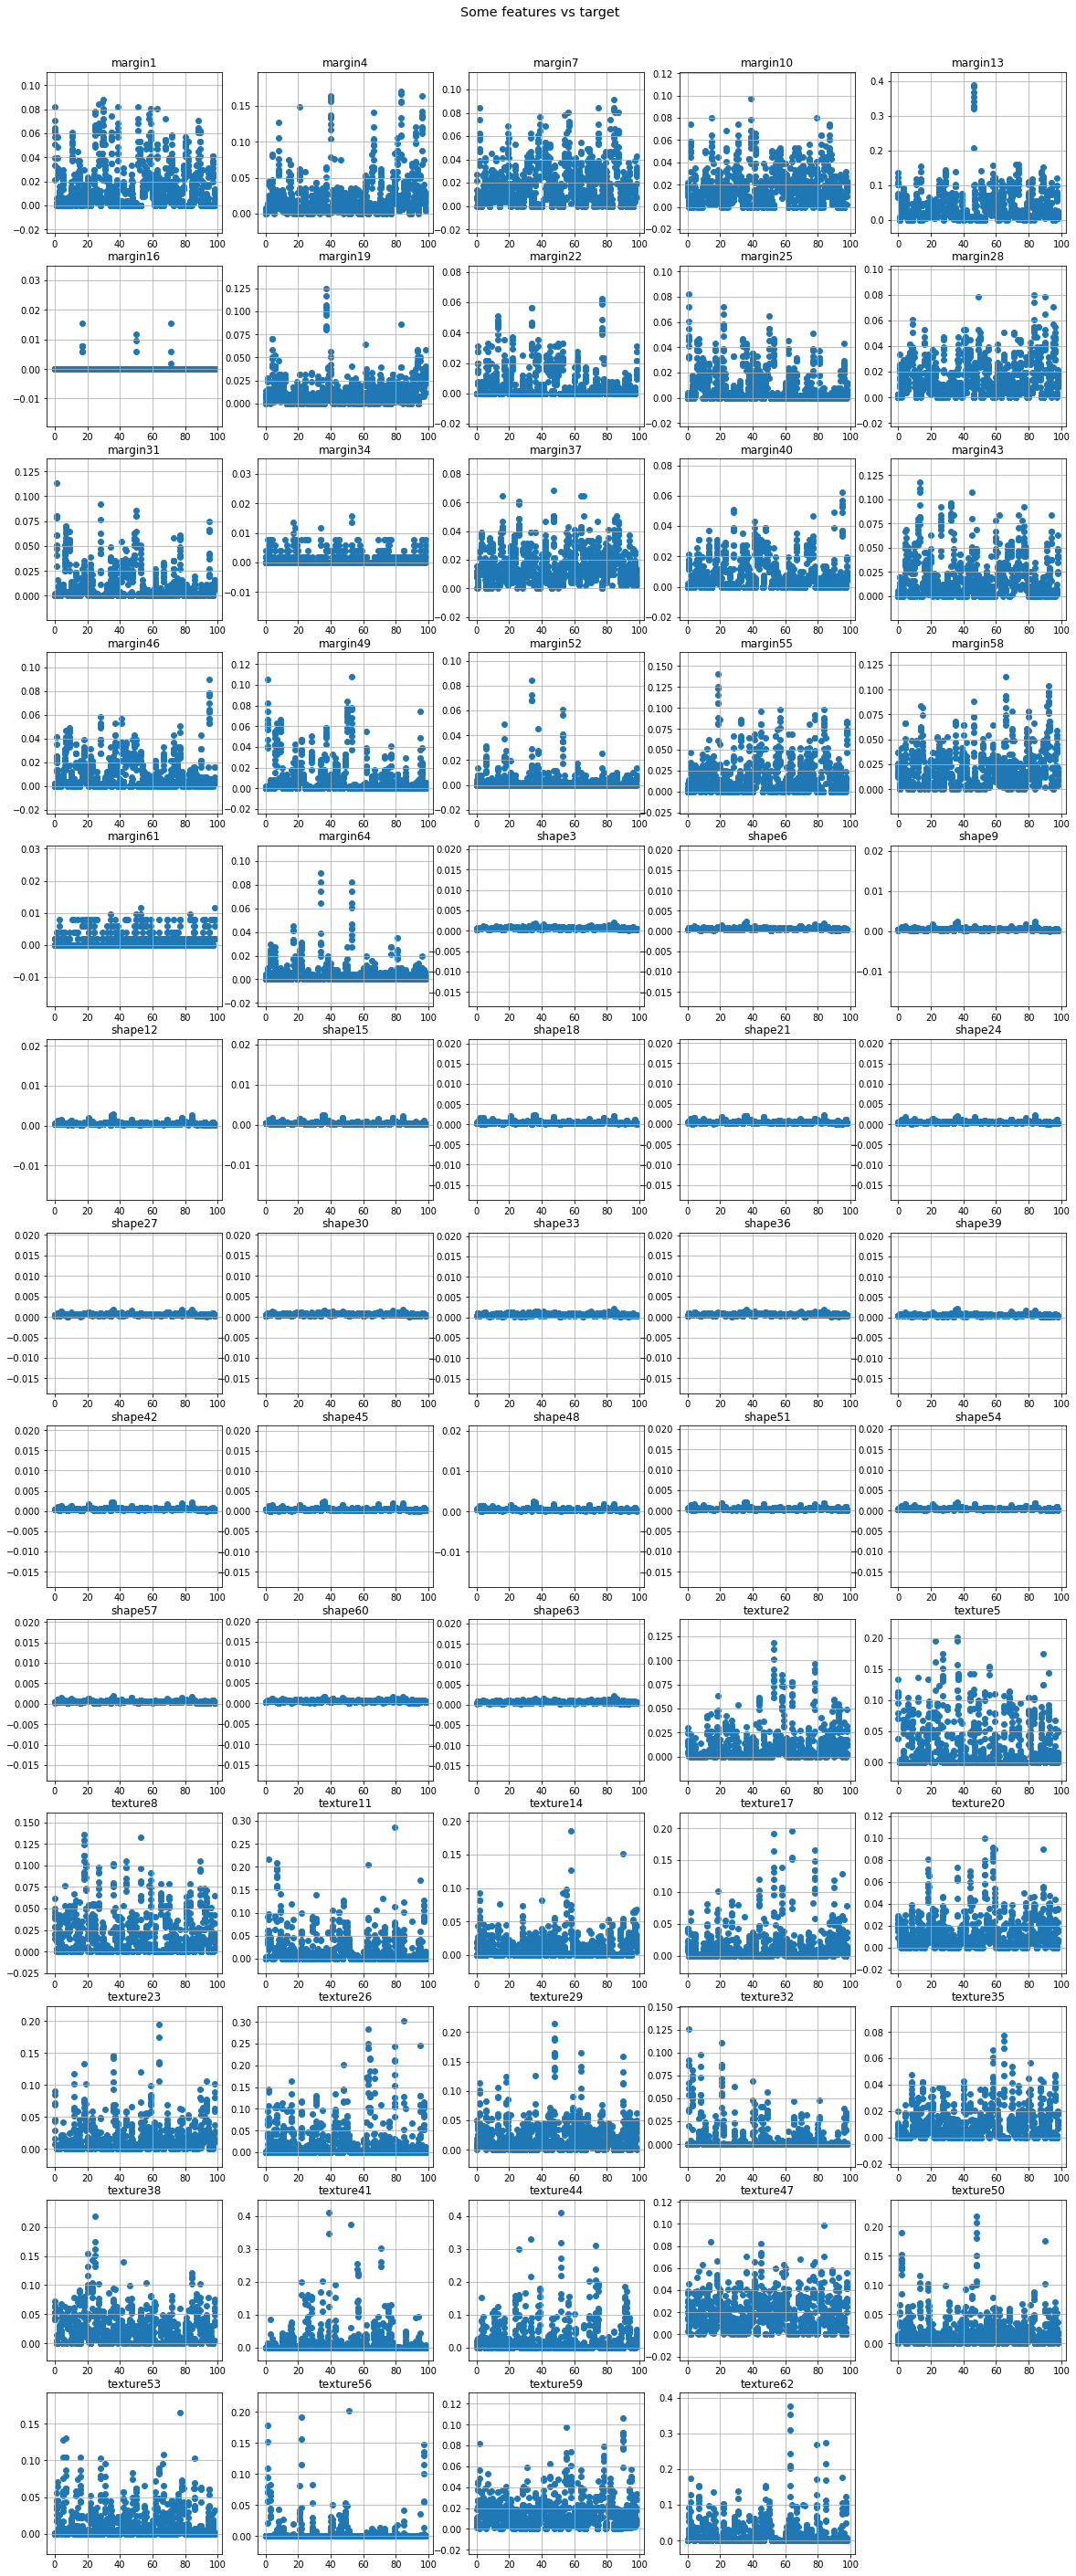

In [79]:
ncols = 5
nrows = int(len(fs)/ncols) + 1
plt.figure(figsize=(20, ncols*10))
st = plt.suptitle("Some features vs target", fontsize="x-large")

for n, feature in enumerate(fs):
    plt.subplot(nrows, ncols, n+1)
    plt.scatter(target, train[feature].values)
    plt.grid()
    plt.title(feature)
st.set_y(0.9)
plt.show()

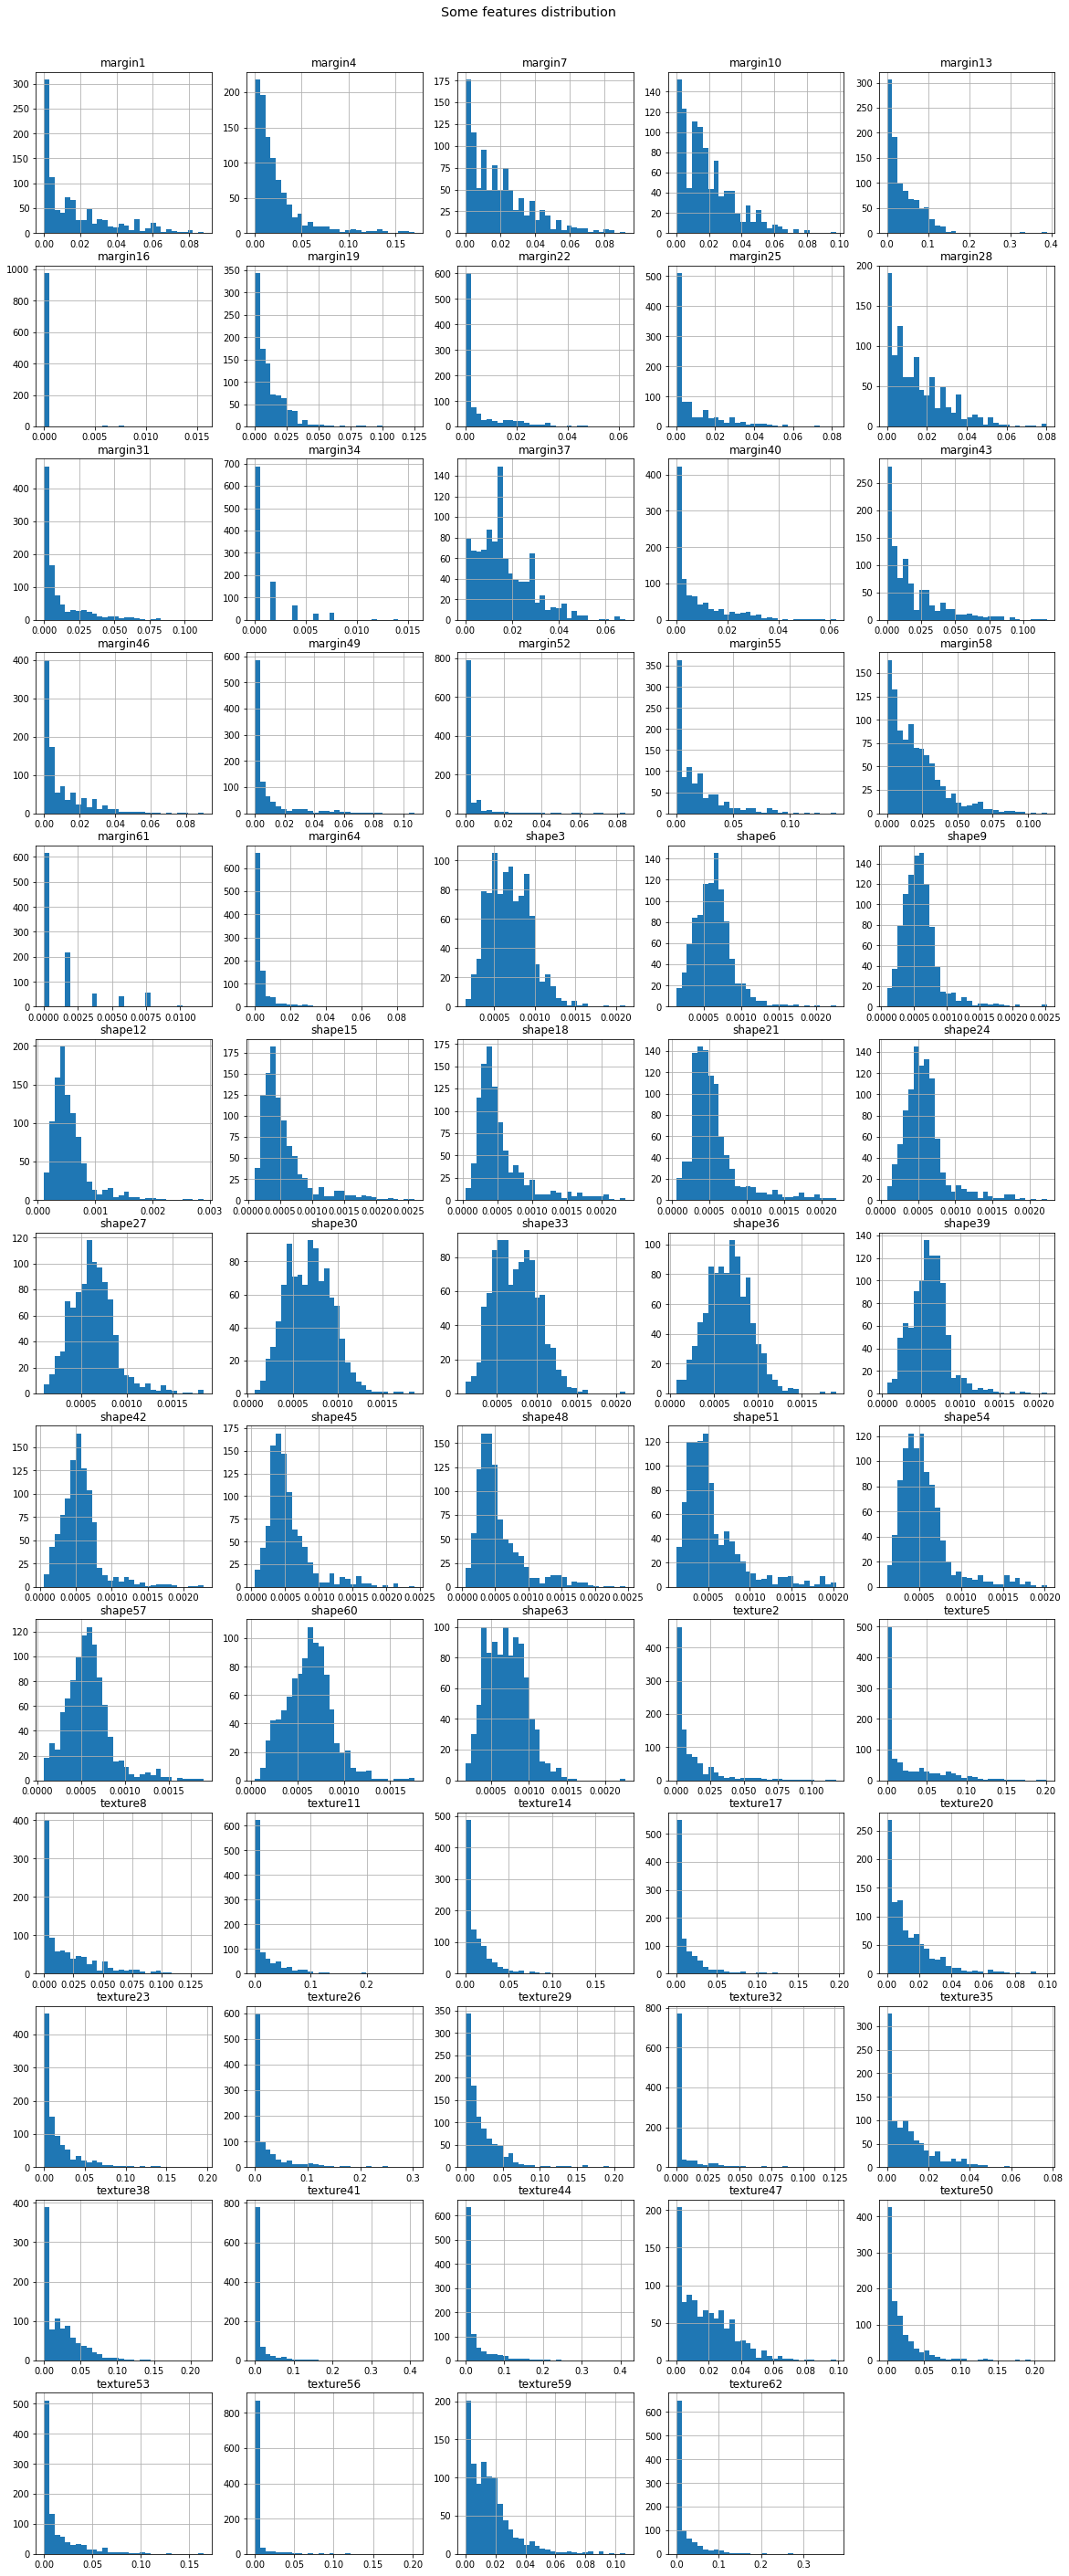

In [80]:
ncols = 5
nrows = int(len(fs)/ncols) + 1
plt.figure(figsize=(20, ncols*10))
st = plt.suptitle("Some features distribution", fontsize="x-large")

for n, feature in enumerate(fs):
    plt.subplot(nrows, ncols, n+1)
    plt.hist(train[feature].values, bins=30)
    plt.grid()
    plt.title(feature)
st.set_y(0.9)
plt.show()

# Images